<a href="https://colab.research.google.com/github/TasneemBadry/TasneemBadry/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
#matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:

input_ = "heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(input_)
df = data.copy()

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
inp_data = data.drop(data[['DEATH_EVENT']], axis=1)
out_data = data[['DEATH_EVENT']]

scaler = MinMaxScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier(random_state=42)
mlpc_model.fit(X_train, y_train)
y_pred = mlpc_model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7833
SVC f1-score  : 0.6667
SVC precision : 0.5200
SVC recall    : 0.9286

               precision    recall  f1-score   support

           0       0.97      0.74      0.84        46
           1       0.52      0.93      0.67        14

    accuracy                           0.78        60
   macro avg       0.75      0.83      0.75        60
weighted avg       0.87      0.78      0.80        60



In [ ]:
activation = list(['identity', 'logistic', 'tanh', 'relu'])
solver = list(['lbfgs', 'sgd', 'adam'])
alpha = list([0.0001, 0.05])
learning_rate = list(['constant','adaptive'])
hidden_layer_sizes = list([(50,50,50), (50,100,50), (100,)])

param_grid = dict(
    activation = activation,
    solver = solver,
    alpha = alpha,
    learning_rate = learning_rate,
    hidden_layer_sizes = hidden_layer_sizes
)

mlp = MLPClassifier(max_iter=100)
clf = GridSearchCV(mlp, param_grid, cv=10, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
mlpc_model = MLPClassifier(
    activation="identity",
    alpha=0.0001,
    hidden_layer_sizes= (50, 50, 50),
    learning_rate= 'constant',
    solver= 'adam',
    random_state=42).fit(X_train, y_train)
y_pred = mlpc_model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8167
SVC f1-score  : 0.7317
SVC precision : 0.6000
SVC recall    : 0.9375

               precision    recall  f1-score   support

           0       0.97      0.77      0.86        44
           1       0.60      0.94      0.73        16

    accuracy                           0.82        60
   macro avg       0.79      0.86      0.80        60
weighted avg       0.87      0.82      0.83        60



<Axes: >

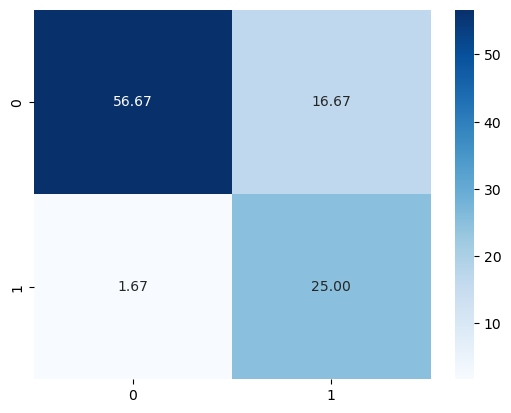

In [ ]:
cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

In [ ]:
from imblearn.over_sampling import SMOTE

sms = SMOTE(random_state=12345)
X_res, y_res = sms.fit_resample(inp_data, out_data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (324, 12)
X_test Shape  :  (82, 12)
y_train Shape :  (324, 1)
y_test Shape  :  (82, 1)


In [ ]:
activation = list(['identity', 'logistic', 'tanh', 'relu'])
solver = list(['lbfgs', 'sgd', 'adam'])
alpha = list([0.0001, 0.05])
learning_rate = list(['constant','adaptive'])
hidden_layer_sizes = list([(50,50,50), (50,100,50), (100,)])

param_grid = dict(
    activation = activation,
    solver = solver,
    alpha = alpha,
    learning_rate = learning_rate,
    hidden_layer_sizes = hidden_layer_sizes
)

mlp = MLPClassifier(max_iter=100)
clf = GridSearchCV(mlp, param_grid, cv=10, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}

In [ ]:
mlpc_model = MLPClassifier(
    activation="relu",
    alpha=0.05,
    hidden_layer_sizes= (100,),
    learning_rate= 'adaptive',
    solver= 'lbfgs',
    random_state=42).fit(X_train, y_train)
y_pred = mlpc_model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8049
SVC f1-score  : 0.8222
SVC precision : 0.9024
SVC recall    : 0.7551

               precision    recall  f1-score   support

           0       0.71      0.88      0.78        33
           1       0.90      0.76      0.82        49

    accuracy                           0.80        82
   macro avg       0.80      0.82      0.80        82
weighted avg       0.82      0.80      0.81        82



<Axes: >

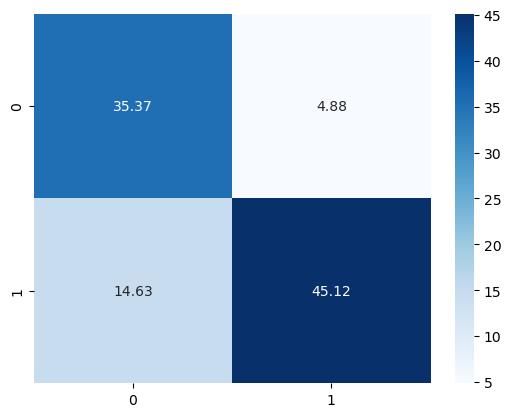

In [ ]:
cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

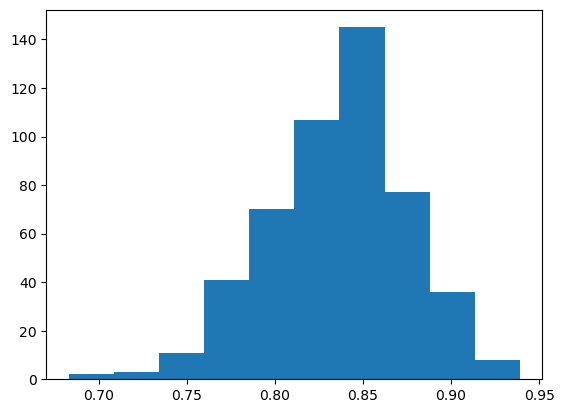

In [ ]:
scores = []
for i in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
    mlpc_model = MLPClassifier(
        activation="relu",
        alpha=0.05,
        hidden_layer_sizes= (100,),
        learning_rate= 'adaptive',
        solver= 'lbfgs',
        random_state=42).fit(X_train, y_train)
    y_pred = mlpc_model.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))

plt.hist(scores)
plt.show()